## Import Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Read dataset

In [4]:
employee_df = pd.read_csv("/Users/amit/Desktop/train_MpHjUjU.csv")

In [5]:
employee_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [6]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [7]:
employee_df["Salary"].value_counts()

48747     57
109652    32
68356     30
42260     28
67490     28
          ..
59653      1
19235      1
17186      1
49659      1
57356      1
Name: Salary, Length: 2383, dtype: int64

In [8]:
employee_df.sort_values("Total Business Value")

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
2195,2016-06-01,342,44,Male,C18,Master,83084,2015-07-09,NaN,3,3,-6000000,4
5289,2017-03-01,787,34,Male,C26,Bachelor,75467,2016-08-30,NaN,3,3,-5483890,2
9155,2016-06-01,1354,34,Female,C20,Master,54212,2015-10-09,NaN,2,3,-3791250,1
16592,2016-10-01,2455,25,Male,C28,Bachelor,99691,2014-06-18,NaN,1,4,-2910060,1
7119,2016-12-01,1064,34,Male,C27,College,104966,2016-07-18,NaN,3,3,-2628700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14928,2017-12-01,2210,39,Male,C26,Bachelor,112513,2016-03-30,NaN,1,4,16979740,4
140,2016-03-01,26,41,Male,C14,Master,121529,2015-05-07,NaN,1,3,17651940,4
17094,2016-03-01,2522,34,Female,C13,Bachelor,90057,2010-04-01,NaN,2,5,20596160,4
14192,2017-12-01,2114,41,Female,C19,College,105686,2013-06-24,NaN,2,4,23550000,4


## Adding salary rank column

In [9]:
employee_df["Salary rank"] = employee_df["Salary"].rank(ascending = False).astype("int")
employee_df.head(3)
employee_df.sort_values(by = "Salary", ascending = False)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank
1953,2016-02-01,308,30,Male,C5,Master,188418,2011-08-15,NaN,2,5,3225570,3,12
1960,2016-09-01,308,31,Male,C5,Master,188418,2011-08-15,NaN,2,5,2182320,4,12
1975,2017-12-01,308,32,Male,C5,Master,188418,2011-08-15,NaN,2,5,3772910,2,12
1974,2017-11-01,308,32,Male,C5,Master,188418,2011-08-15,NaN,2,5,1037000,2,12
1973,2017-10-01,308,32,Male,C5,Master,188418,2011-08-15,NaN,2,5,2401800,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11242,2017-11-01,1669,22,Male,C25,College,11068,2016-09-08,NaN,1,1,0,1,19092
8664,2016-01-01,1275,30,Female,C18,College,10883,2015-09-23,2016-01-25,1,1,0,1,19101
3419,2017-05-01,515,26,Female,C29,College,10747,2017-04-13,NaN,2,2,0,1,19103
3418,2017-04-01,515,26,Female,C29,College,10747,2017-04-13,NaN,2,2,0,1,19103


In [10]:
employee_df.sort_values("LastWorkingDate", na_position = "last")

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank
8991,2016-01-01,1329,31,Male,C29,Master,70088,2015-09-10,2015-12-31,1,1,0,1,7287
18219,2016-01-01,2665,36,Female,C17,Master,22719,2015-10-15,2015-12-31,1,1,0,1,18234
4601,2016-01-01,689,28,Female,C10,Bachelor,17186,2015-10-14,2015-12-31,1,1,0,1,18838
6466,2016-01-01,967,45,Male,C11,Master,59526,2015-10-05,2015-12-31,2,2,0,1,9738
6209,2016-01-01,929,31,Male,C4,Bachelor,20245,2015-07-14,2015-12-31,2,2,0,1,18522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2017-08-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,740280,3,7242
19100,2017-09-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,448370,3,7242
19101,2017-10-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,0,2,7242
19102,2017-11-01,2788,30,Male,C27,Master,70254,2017-06-08,NaN,2,2,200420,2,7242


## Changing DOJ and Last date to Datetime from Char

In [11]:
employee_df["Dateofjoining"] = pd.to_datetime(employee_df["Dateofjoining"])
employee_df["LastWorkingDate"] = pd.to_datetime(employee_df["LastWorkingDate"])

## Calculating days in service

In [12]:
employee_df["Served"] = employee_df["LastWorkingDate"] - employee_df["Dateofjoining"]

In [13]:
employee_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank,Served
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,10337,NaT
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,10337,NaT
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,10337,78 days
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,8025,NaT
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,8025,NaT


In [14]:
employee_df.sort_values(["Dateofjoining","Served"], na_position = "last")
employee_df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank,Served
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,10337,NaT
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,10337,NaT
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,10337,78 days
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,8025,NaT
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,8025,NaT


## Creating new column to calssify employee exit

In [15]:
employee_df["Exit"] = employee_df["Served"].notnull()
employee_df["gen"] = employee_df["Gender"] == "Female"
employee_df["gen"] = employee_df["gen"].astype("int")
gen_group = employee_df.groupby(["Gender","Exit"])
gen_group.size()

Gender  Exit 
Female  False     7333
        True       668
Male    False    10155
        True       948
dtype: int64

In [16]:
employee_df.head(2)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank,Served,Exit,gen
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,10337,NaT,False,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,10337,NaT,False,0


In [17]:
employee_exit = pd.DataFrame(employee_df[employee_df["Exit"] == True])
employee_present = pd.DataFrame(employee_df[employee_df["Exit"] == False])

In [18]:
employee_present.groupby("Emp_ID").mean()
employee_df.groupby("Emp_ID").mean()

,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank,Exit,gen
Emp_ID,,,,,,,,,
1,28.000000,57387.0,1.0,1.0,571860.000000,2.000000,10337.0,0.333333,0.0
2,31.000000,67016.0,2.0,2.0,0.000000,1.000000,8025.0,0.000000,0.0
4,43.000000,65603.0,2.0,2.0,70000.000000,1.000000,8439.0,0.200000,0.0
5,29.000000,46368.0,1.0,1.0,40120.000000,1.000000,13400.0,0.333333,0.0
6,31.000000,78728.0,3.0,3.0,253000.000000,1.600000,5704.0,0.000000,1.0
...,...,...,...,...,...,...,...,...,...
2784,33.500000,82815.0,2.0,3.0,906200.833333,2.625000,4995.0,0.000000,0.0
2785,34.000000,12105.0,1.0,1.0,0.000000,1.000000,19063.0,0.333333,1.0
2786,44.888889,35370.0,2.0,2.0,312787.777778,1.666667,15935.0,0.111111,0.0


In [19]:
employee_df["Emp_ID"].nunique()

2381

In [20]:
employee_exit

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Salary rank,Served,Exit,gen
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,10337,78 days,True,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,8439,141 days,True,0
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,13400,58 days,True,0
20,2017-11-01,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1,7176,57 days,True,0
27,2016-12-01,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1,17384,175 days,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2017-02-01,2779,28,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1,3307,19 days,True,0
19054,2016-08-01,2782,26,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1,17072,92 days,True,0
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,19063,61 days,True,1
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,15935,419 days,True,0


In [21]:
emp_g = employee_df.groupby(["Emp_ID"])
emp_s = emp_g.agg({"Age":"max","Gender":"max", "City":"max", "Education_Level":"max", "Salary":"max","Dateofjoining":"max","LastWorkingDate":"max", "Joining Designation":"max", "Designation":"max", "Total Business Value":"sum", "Quarterly Rating":"mean", "gen":"max", "Served":"max", "Exit":"max"})
emp_s

,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,gen,Served,Exit
Emp_ID,,,,,,,,,,,,,,
1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,1715580,2.000000,0,78 days,True
2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1.000000,0,NaT,False
4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,350000,1.000000,0,141 days,True
5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360,1.000000,0,58 days,True
6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,1265000,1.600000,1,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,21748820,2.625000,0,NaT,False
2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1.000000,1,61 days,True
2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,2815090,1.666667,0,419 days,True


In [22]:
emp_exit = emp_s[emp_s["Exit"] == True]
emp_present = emp_s[emp_s["Exit"] == False]

In [23]:
emp_exit.reset_index(inplace = True)
emp_present.reset_index(inplace = True)

<AxesSubplot:title={'center':'Total Employees in various Designations'}, ylabel='None'>

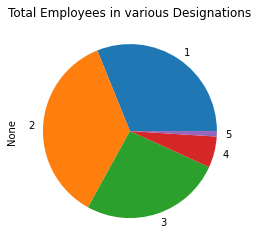

In [24]:
plt.title("Total Employees in various Designations")
emp_s.groupby("Designation").size().plot(kind = "pie")

<AxesSubplot:title={'center':'Employees Exit in various Designations'}, ylabel='None'>

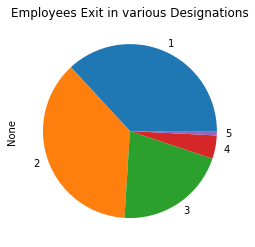

In [25]:
plt.title("Employees Exit in various Designations")
emp_exit.groupby("Designation").size().plot(kind = "pie")

<AxesSubplot:title={'center':'Employees retained in various Designations'}, ylabel='None'>

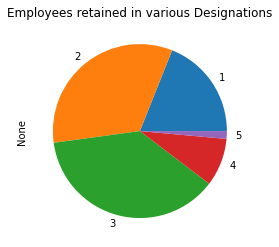

In [26]:
plt.title("Employees retained in various Designations")
emp_present.groupby("Designation").size().plot(kind = "pie")

<AxesSubplot:xlabel='No. of Total employees', ylabel='Education_Level'>

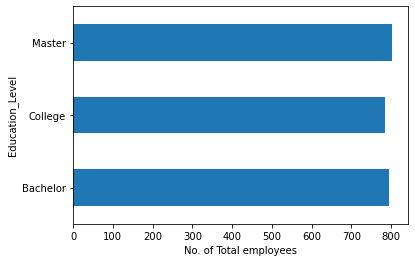

In [27]:
plt.xlabel("No. of Total employees")
emp_s.groupby("Education_Level").size().plot(kind = "barh")

<AxesSubplot:xlabel='No. of Empoyee exits', ylabel='Education_Level'>

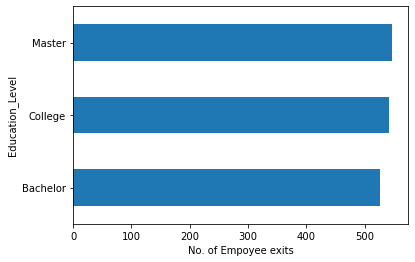

In [28]:
plt.xlabel("No. of Empoyee exits")
emp_exit.groupby("Education_Level").size().plot(kind = "barh")

## Change Served column to months

In [29]:
emp_exit["Served_months"] = emp_exit["Served"]/np.timedelta64(1, 'M')

<ipython-input-29-f77d8571d5b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_exit["Served_months"] = emp_exit["Served"]/np.timedelta64(1, 'M')


In [30]:
def custom_round(days_served):
    return int((days_served / 5.0) * 5)
emp_exit["Served_months"].apply(custom_round).value_counts().sort_index()

0      60
1     118
2     183
3     179
4     170
     ... 
76      4
80      1
81      1
83      2
84      3
Name: Served_months, Length: 78, dtype: int64

In [31]:
emp_exit["Served_months"].apply(custom_round).nunique()

78

<AxesSubplot:title={'center':'Employee exits vs. number of months served'}, xlabel='Months Served', ylabel='Frequency'>

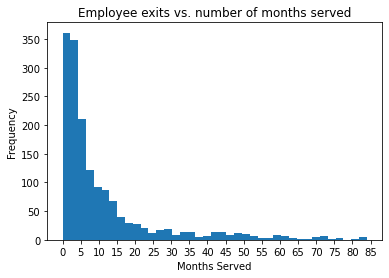

In [32]:
x=emp_exit["Served_months"]
plt.xticks(np.arange(min(x), max(x)+5, 5.0))
plt.title("Employee exits vs. number of months served")
plt.xlabel("Months Served")
emp_exit["Served_months"].apply(custom_round).plot(kind="hist", bins=39)

In [33]:
def custom_round_rating(rating):
    return int(rating / 1.0) * 1
emp_exit["Quarterly Rating"].apply(custom_round_rating).value_counts()

1    1337
2     244
3      33
4       2
Name: Quarterly Rating, dtype: int64

<AxesSubplot:title={'center':'Employee Exits vs. QR'}, ylabel='Frequency'>

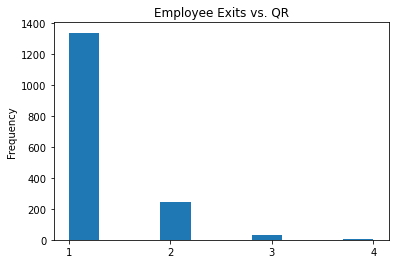

In [34]:
x=emp_exit["Quarterly Rating"]
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Employee Exits vs. QR")
emp_exit["Quarterly Rating"].apply(custom_round_rating).plot(kind="hist")

In [35]:
emp_exit_12m = emp_exit[emp_exit["Served_months"] < 12]
emp_exit_12m

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,gen,Served,Exit,Served_months
0,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,1715580,2.0,0,78 days,True,2.562681
1,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,350000,1.0,0,141 days,True,4.632539
2,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360,1.0,0,58 days,True,1.905583
3,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1.0,0,57 days,True,1.872728
4,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,2607180,2.5,0,175 days,True,5.749605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2776,27,Female,C27,Bachelor,54397,2016-01-04,2016-04-04,2,2,0,1.0,1,91 days,True,2.989794
1611,2779,28,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1.0,0,19 days,True,0.624243
1612,2782,26,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1.0,0,92 days,True,3.022649
1613,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1.0,1,61 days,True,2.004148


<AxesSubplot:ylabel='Frequency'>

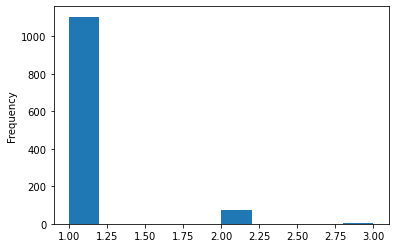

In [36]:
emp_exit_12m["Quarterly Rating"].apply(custom_round_rating).plot(kind="hist")

In [37]:
emp_exit_12m_ = emp_exit[emp_exit["Served_months"] >= 12]
emp_exit_12m_

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,gen,Served,Exit,Served_months
5,13,31,Male,C19,Master,119227,2012-05-28,2017-11-25,1,4,10213040,1.260870,0,2007 days,True,65.939752
7,17,43,Male,C20,Master,51099,2015-03-06,2016-07-20,1,1,1017640,1.428571,0,502 days,True,16.493152
10,21,34,Female,C29,Bachelor,22755,2015-05-12,2017-02-17,1,1,6962550,2.285714,1,647 days,True,21.257110
11,22,41,Male,C10,Master,31224,2015-05-25,2017-04-26,1,1,7539490,2.875000,0,702 days,True,23.064129
12,24,31,Male,C24,Master,76308,2015-05-25,2016-10-27,1,2,4101720,2.300000,0,521 days,True,17.117395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,2759,29,Male,C17,Bachelor,82260,2015-08-24,2016-10-28,2,2,5018600,2.500000,0,431 days,True,14.160455
1605,2766,37,Female,C21,Bachelor,53793,2010-11-05,2017-11-30,2,3,25164110,2.875000,1,2582 days,True,84.831311
1606,2768,30,Female,C1,Master,80138,2013-05-06,2016-05-30,1,2,2565930,1.500000,1,1120 days,True,36.797470
1607,2772,23,Female,C26,College,51670,2014-06-12,2016-05-02,1,2,1784850,1.600000,1,690 days,True,22.669870


<AxesSubplot:ylabel='Frequency'>

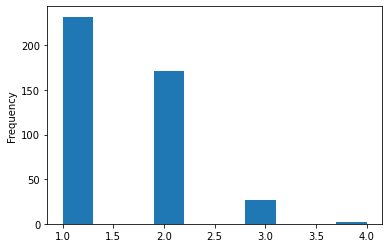

In [38]:
emp_exit_12m_["Quarterly Rating"].apply(custom_round_rating).plot(kind="hist")

In [39]:
attrition_model = RandomForestRegressor(random_state=1)

In [40]:
emp_s["Served(months)"] = emp_s["Served"]/np.timedelta64(1, 'M')
emp_s

,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,gen,Served,Exit,Served(months)
Emp_ID,,,,,,,,,,,,,,,
1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,1715580,2.000000,0,78 days,True,2.562681
2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1.000000,0,NaT,False,NaN
4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,350000,1.000000,0,141 days,True,4.632539
5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360,1.000000,0,58 days,True,1.905583
6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,1265000,1.600000,1,NaT,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,21748820,2.625000,0,NaT,False,NaN
2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1.000000,1,61 days,True,2.004148
2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,2815090,1.666667,0,419 days,True,13.766196


In [41]:
emp_exit["Served_days"] = emp_exit["Served"]/np.timedelta64(1, 'D')
attrition_features = ['Quarterly Rating', 'Designation', 'Age', 'gen']
X = emp_exit[attrition_features]
y = emp_exit["Served_days"]

<ipython-input-41-b2dbe94ec7c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_exit["Served_days"] = emp_exit["Served"]/np.timedelta64(1, 'D')


In [42]:
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [43]:
attrition_model.fit(train_X, train_y)
day_preds = attrition_model.predict(val_X)
print(mean_absolute_error(val_y, day_preds))

254.26276396555468


In [44]:
attrition_model.fit(X, y)

RandomForestRegressor(random_state=1)

In [45]:
X1 = emp_present[attrition_features]
predicted_Served = attrition_model.predict(X1)

In [46]:
emp_exit

,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,gen,Served,Exit,Served_months,Served_days
0,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,1715580,2.000000,0,78 days,True,2.562681,78.0
1,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,350000,1.000000,0,141 days,True,4.632539,141.0
2,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,120360,1.000000,0,58 days,True,1.905583,58.0
3,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1.000000,0,57 days,True,1.872728,57.0
4,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,2607180,2.500000,0,175 days,True,5.749605,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,2779,28,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1.000000,0,19 days,True,0.624243,19.0
1612,2782,26,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1.000000,0,92 days,True,3.022649,92.0
1613,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1.000000,1,61 days,True,2.004148,61.0
1614,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,2815090,1.666667,0,419 days,True,13.766196,419.0


In [47]:
emp_present['predict'] = pd.to_timedelta(predicted_Served*np.timedelta64(1, 'D'))

<ipython-input-47-457bfc98af7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_present['predict'] = pd.to_timedelta(predicted_Served*np.timedelta64(1, 'D'))


In [48]:
emp_present["predict_LastDate"] = emp_present["Dateofjoining"] + emp_present['predict']
emp_present

<ipython-input-48-0b0a7511a4b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_present["predict_LastDate"] = emp_present["Dateofjoining"] + emp_present['predict']


,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,gen,Served,Exit,predict,predict_LastDate
0,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1.000000,0,NaT,False,220 days,2018-06-14
1,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,1265000,1.600000,1,NaT,False,824 days,2019-11-02
2,11,28,Female,C19,Master,42172,2017-12-07,NaT,1,1,0,1.000000,1,NaT,False,224 days,2018-07-19
3,14,39,Female,C26,College,19734,2017-10-16,NaT,3,3,0,1.000000,1,NaT,False,656 days,2019-08-03
4,25,31,Male,C24,Bachelor,102077,2014-10-30,NaT,1,3,36351110,3.750000,0,NaT,False,595 days,2016-06-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,2775,27,Male,C9,College,85112,2017-10-02,NaT,3,3,0,1.000000,0,NaT,False,141 days,2018-02-20
761,2778,35,Male,C13,Master,50180,2017-11-29,NaT,2,2,0,1.000000,0,NaT,False,108 days,2018-03-17
762,2781,25,Male,C23,Master,46952,2017-02-17,NaT,2,2,8633370,3.181818,0,NaT,False,487 days,2018-06-19
763,2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,21748820,2.625000,0,NaT,False,1523 days,2016-12-16


In [49]:
# emp_present

In [50]:
employee_test = pd.read_csv("/Users/amit/Desktop/test_hXY9mYw.csv")

In [51]:
# employee_test["id"] = employee_test.index
employee_test

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


In [52]:
emp_present['July'] = emp_present['predict_LastDate'] < '2018-07-01'

<ipython-input-52-3ee0541d69e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_present['July'] = emp_present['predict_LastDate'] < '2018-07-01'


In [53]:
emp_present[emp_present["July"] == True]["Emp_ID"]

0         2
4        25
5        26
6        31
10       47
       ... 
759    2771
760    2775
761    2778
762    2781
763    2784
Name: Emp_ID, Length: 540, dtype: int64

In [54]:
def check_val(e_id):
    return e_id in emp_present[emp_present["July"] == True]["Emp_ID"].values

employee_test["Target"] = employee_test["Emp_ID"].apply(check_val)


In [55]:
employee_test["Target"] = employee_test["Target"].astype("int")

In [56]:
employee_test.index = employee_test["Emp_ID"]
employee_test = employee_test.drop(["Emp_ID"], axis=1)

In [57]:
employee_test.to_csv('Submit.csv')